# Dataset upload

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/product_info.csv'
df = pd.read_csv(path)

Mounted at /content/drive


# Data Preparation

In [ ]:
df

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


In [ ]:
print(df.shape)

(8494, 27)


In [ ]:
df.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [ ]:
df = df.drop(columns=['brand_id', 'product_id', 'variation_type', 'variation_value', 'variation_desc', 'value_price_usd', 'sale_price_usd', 'new', 'out_of_stock'])
df.columns

Index(['product_name', 'brand_name', 'loves_count', 'rating', 'reviews',
       'size', 'ingredients', 'price_usd', 'limited_edition', 'online_only',
       'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [ ]:
print(df.shape)

(8494, 18)


In [ ]:
df.dtypes

,0
product_name,object
brand_name,object
loves_count,int64
rating,float64
reviews,float64
size,object
ingredients,object
price_usd,float64
limited_edition,int64
online_only,int64


In [ ]:
# Convert size to numeric if applicable
df['size'] = pd.to_numeric(df['size'], errors='coerce')

# Convert binary columns to boolean
df['limited_edition'] = df['limited_edition'].astype(bool)
df['online_only'] = df['online_only'].astype(bool)
df['sephora_exclusive'] = df['sephora_exclusive'].astype(bool)

In [ ]:
df.isnull().sum()

,0
product_name,0
brand_name,0
loves_count,0
rating,278
reviews,278
size,8494
ingredients,945
price_usd,0
limited_edition,0
online_only,0


In [ ]:
# Convert types
df['size'] = pd.to_numeric(df['size'], errors='coerce')
for col in ['limited_edition', 'online_only', 'sephora_exclusive']:
    df[col] = df[col].astype(bool)

# Handle missing values
df.fillna({'highlights': df['highlights'].mode()[0],
           'ingredients': df['ingredients'].mode()[0],
           'rating': df['rating'].median(),
           'reviews': df['reviews'].median()}, inplace=True)
df.dropna(subset=['secondary_category', 'tertiary_category'], inplace=True)


In [ ]:
df.dtypes

,0
product_name,object
brand_name,object
loves_count,int64
rating,float64
reviews,float64
size,float64
ingredients,object
price_usd,float64
limited_edition,bool
online_only,bool


In [ ]:
df.describe()


,loves_count,rating,reviews,size,price_usd,child_count,child_max_price,child_min_price
count,7.504000e+03,7504.000000,7504.000000,0.0,7504.000000,7504.000000,2671.000000,2671.000000
mean,3.000226e+04,4.211213,440.664046,NaN,53.526485,1.782383,54.302598,40.109184
std,6.741878e+04,0.494951,1057.300381,NaN,55.124654,5.608580,58.879801,39.009379
min,0.000000e+00,1.000000,1.000000,NaN,3.000000,0.000000,3.000000,3.000000
25%,3.811250e+03,4.000000,32.000000,NaN,26.000000,0.000000,23.000000,19.500000
50%,1.004900e+04,4.289350,126.000000,NaN,36.000000,0.000000,32.000000,29.000000
75%,2.743975e+04,4.527800,420.000000,NaN,60.000000,1.000000,60.000000,42.000000
max,1.401068e+06,5.000000,21281.000000,NaN,1900.000000,105.000000,570.000000,400.000000


# Exploratory Data Analysis

<ipython-input-13-7b906bfddccc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loves_count', y='product_name', data=top_10_products, palette='pastel')


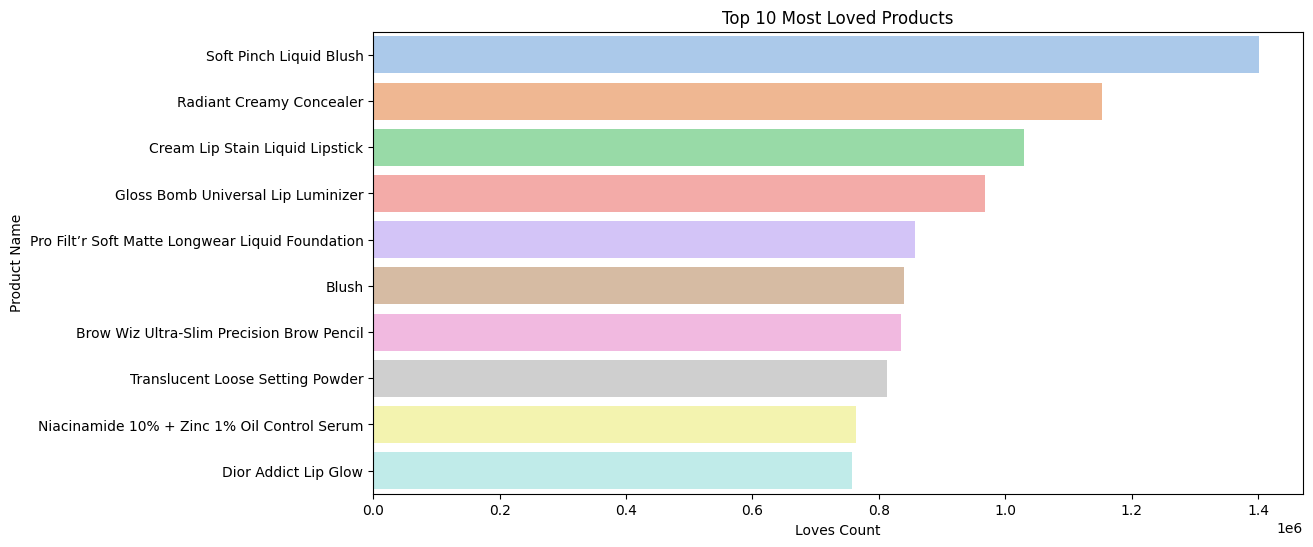

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 most loved products
top_10_products = df.nlargest(10, 'loves_count')
plt.figure(figsize=(12, 6))
sns.barplot(x='loves_count', y='product_name', data=top_10_products, palette='pastel')
plt.xlabel('Loves Count')
plt.ylabel('Product Name')
plt.title('Top 10 Most Loved Products')
plt.show()

<ipython-input-14-0801db634b69>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='price_usd', y='product_name', data=top_10_products, palette='inferno')


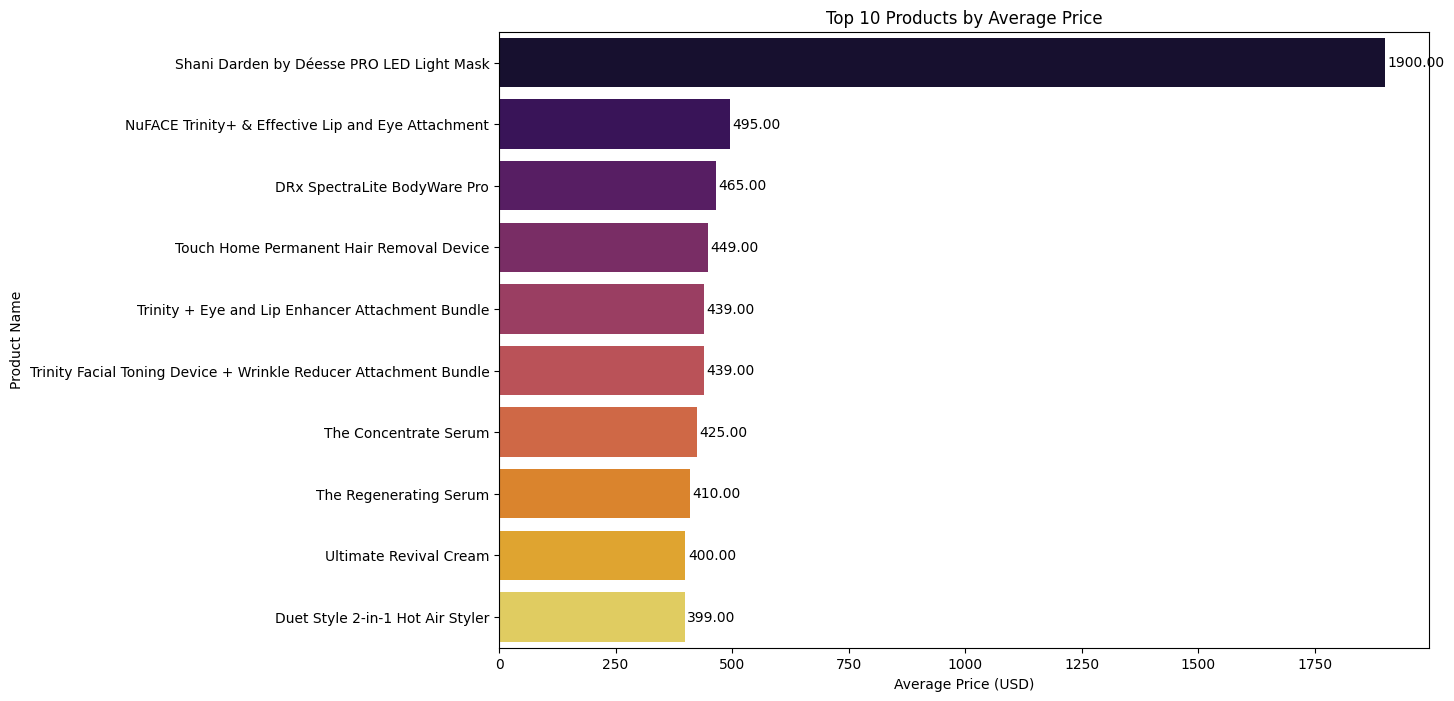

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by product_name and calculate the average price
avg_price_by_brand = df.groupby('product_name')['price_usd'].mean().reset_index()

# Sort the products by average price in descending order and take the top 10
top_10_products = avg_price_by_brand.nlargest(10, 'price_usd')

# Create a bar plot for the top 10 products
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='price_usd', y='product_name', data=top_10_products, palette='inferno')

# Add value labels to the bars
for index, value in enumerate(top_10_products['price_usd']):
    ax.text(value + 5, index, f'{value:.2f}', va='center', fontsize=10)

# Set labels and title
plt.xlabel('Average Price (USD)')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Average Price')

# Show plot
plt.show()


<ipython-input-15-1afe7cf6b732>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='loves_count', y='brand_name', data=top_10_brands, palette='pastel')


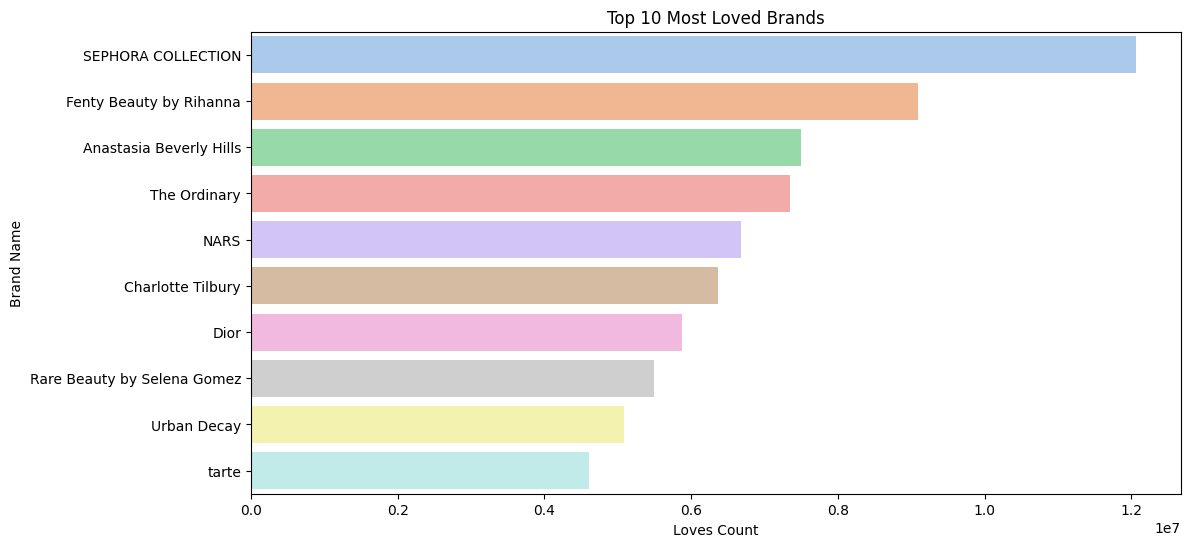

In [ ]:
# Aggregate loves_count by brand and get the top 10 brands
top_10_brands = df.groupby('brand_name', as_index=False)['loves_count'].sum().nlargest(10, 'loves_count')

plt.figure(figsize=(12, 6))
sns.barplot(x='loves_count', y='brand_name', data=top_10_brands, palette='pastel')

plt.xlabel('Loves Count')
plt.ylabel('Brand Name')
plt.title('Top 10 Most Loved Brands')

plt.show()


<ipython-input-16-dd6fc19c327c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='price_usd', y='brand_name', data=top_10_products, palette='inferno')


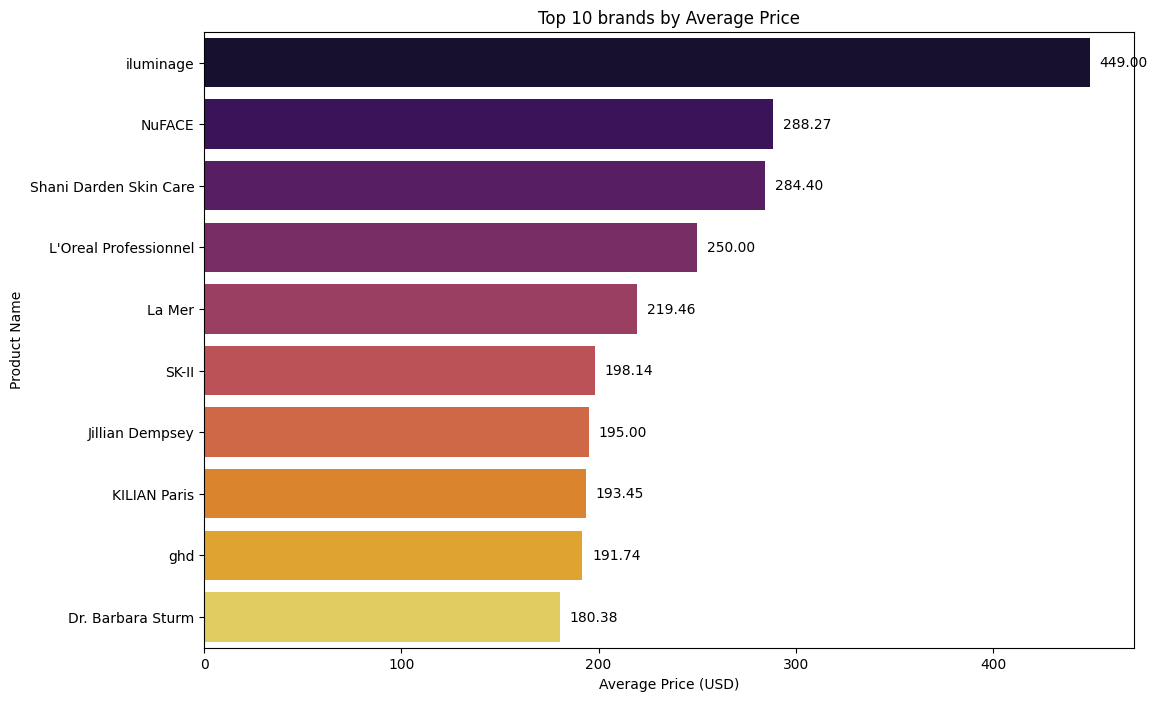

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by product_name and calculate the average price
avg_price_by_brand = df.groupby('brand_name')['price_usd'].mean().reset_index()

# Sort the products by average price in descending order and take the top 10
top_10_brands = avg_price_by_brand.nlargest(10, 'price_usd')

# Create a bar plot for the top 10 products
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='price_usd', y='brand_name', data=top_10_brands, palette='inferno')

# Add value labels to the bars
for index, value in enumerate(top_10_brands['price_usd']):
    ax.text(value + 5, index, f'{value:.2f}', va='center', fontsize=10)

# Set labels and title
plt.xlabel('Average Price (USD)')
plt.ylabel('Product Name')
plt.title('Top 10 brands by Average Price')

# Show plot
plt.show()


<ipython-input-38-63e429c312f0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='price_usd', y='brand_name', data=lowest_10_brands, palette='coolwarm')


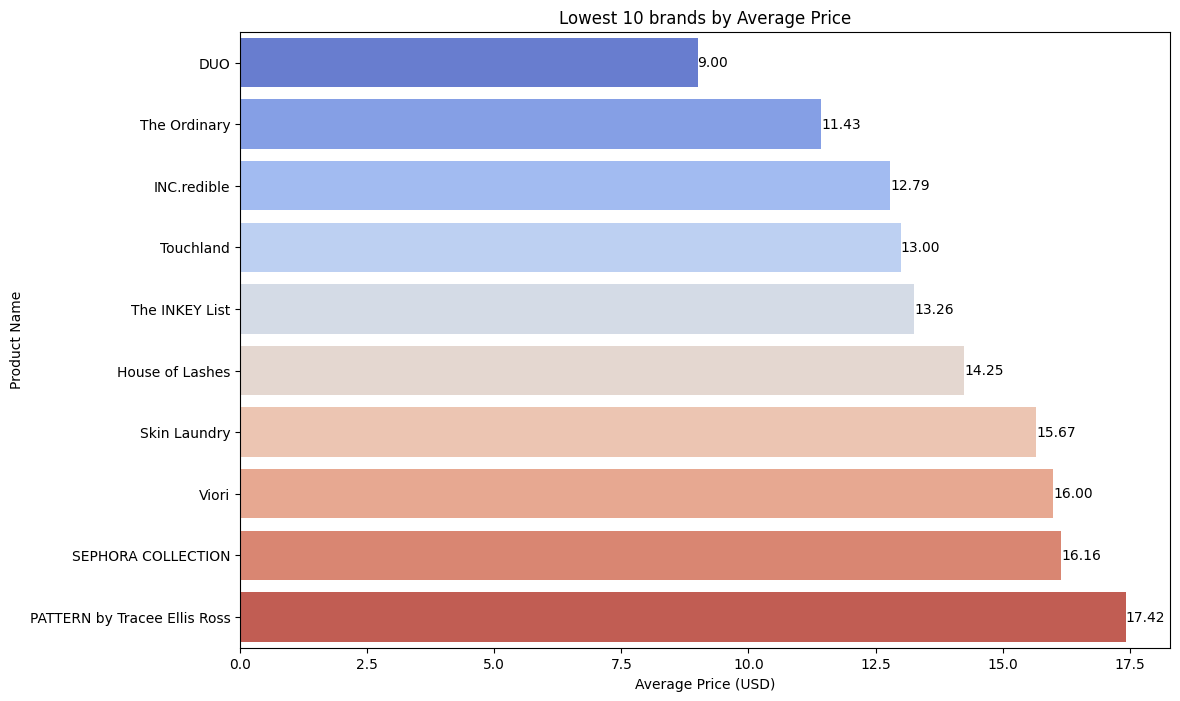

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by product_name and calculate the average price
avg_price_by_brand = df.groupby('brand_name')['price_usd'].mean().reset_index()

# Sort the products by average price in descending order and take the top 10
lowest_10_brands = avg_price_by_brand.nsmallest(10, 'price_usd')

# Create a bar plot for the lowest 10 products
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='price_usd', y='brand_name', data=lowest_10_brands, palette='coolwarm')

# Add value labels to the bars
for index, value in enumerate(lowest_10_brands['price_usd']):
    ax.text(value, index, f'{value:.2f}', va='center', fontsize=10)

# Set labels and title
plt.xlabel('Average Price (USD)')
plt.ylabel('Product Name')
plt.title('Lowest 10 brands by Average Price')

# Show plot
plt.show()


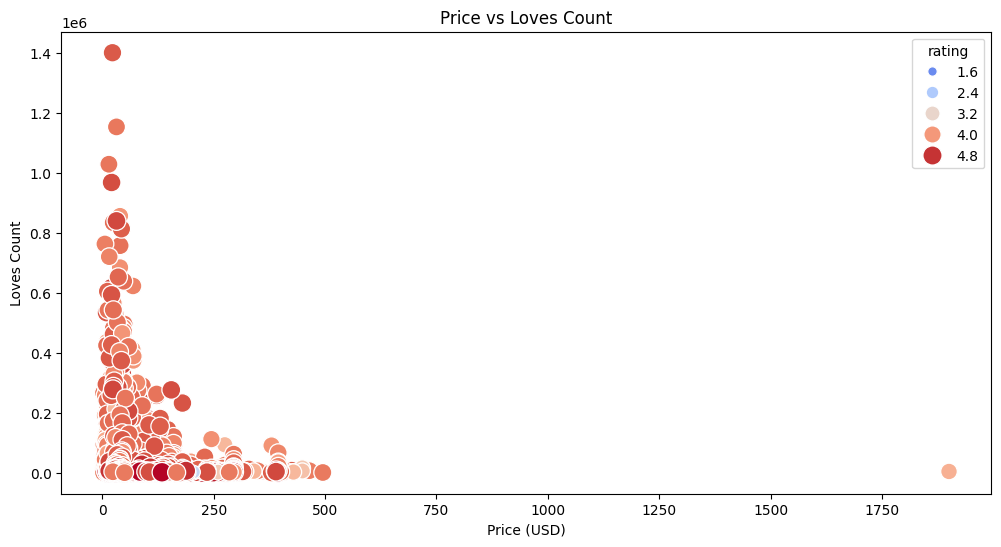

In [ ]:
# Price vs Loves Count Analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price_usd', y='loves_count', hue='rating', size='rating', data=df, palette='coolwarm', sizes=(20, 200))
plt.xlabel('Price (USD)')
plt.ylabel('Loves Count')
plt.title('Price vs Loves Count')
plt.show()

In [ ]:
#highest love counts and their tags ( highlights)
# Find the top 5 products based on 'loves_count'
top_5_products = df.nlargest(5, 'loves_count')

# Display the top 5 products
print(top_5_products[['loves_count', 'highlights']])

      loves_count                                         highlights
6242      1401068  ['Radiant Finish', 'Liquid Formula', 'Communit...
5249      1153594  ['Radiant Finish', 'Hydrating', 'Good for: Dar...
6434      1029051  ['Liquid Formula', 'Community Favorite', 'Long...
2523       968317  ['Vegan', 'Community Favorite', 'Shimmer Finish']
2524       856497  ['Long-wearing', 'Full Coverage', 'Best for Oi...


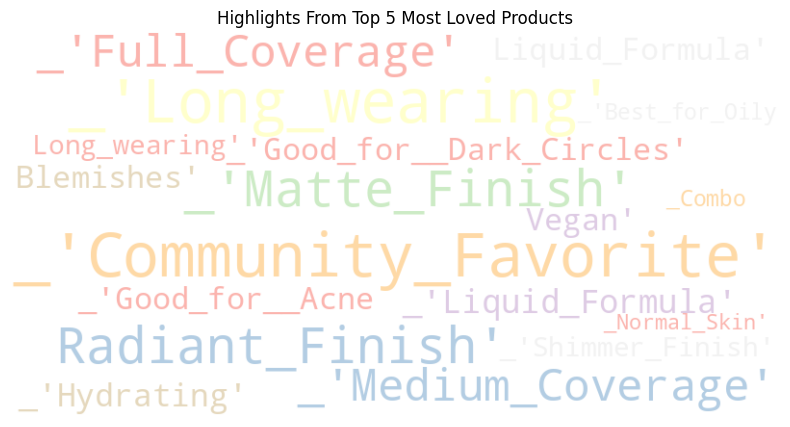

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the highlights to a single string, keeping multi-word phrases intact
text = " ".join(top_5_products['highlights'].dropna().str.replace(" ", "_").str.replace(":", "_").str.replace("-", "_"))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Pastel1", max_words=50).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.title('Highlights From Top 5 Most Loved Products')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.show()


In [ ]:
import pandas as pd

# Increase the column width to show the full content
pd.set_option('display.max_colwidth', None)


In [ ]:
top_ingredients = df.nlargest(5, 'loves_count')
low_ingredients = df.nsmallest(5, 'loves_count')

print(top_ingredients[['loves_count', 'ingredients']])
print(low_ingredients[['loves_count', 'ingredients']])


      loves_count  \
6242      1401068   
5249      1153594   
6434      1029051   
2523       968317   
2524       856497   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    ingre

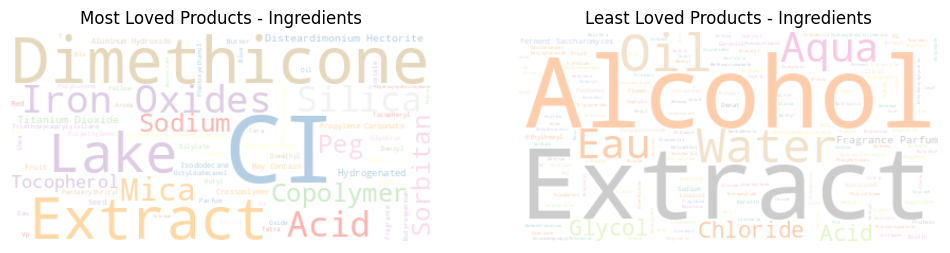

In [ ]:
# Word Cloud for Ingredients of Most and Least Loved Products

top_text = ' '.join(top_ingredients['ingredients'].dropna())
low_text = ' '.join(low_ingredients['ingredients'].dropna())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Most Loved Products - Ingredients')
wordcloud = WordCloud(background_color='white', colormap='Pastel1').generate(top_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Least Loved Products - Ingredients')
wordcloud = WordCloud(background_color='white', colormap='Pastel2').generate(low_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

# Sentiment analysis

In [ ]:
# Convert all reviews to strings before applying sentiment analysis
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['reviews'].astype(str).apply(get_sentiment)



In [ ]:
# Define a function to classify sentiment using rating as the scale
def get_sentiment_from_rating(rating):
    if rating >= 4.0:
        return "Positive"
    elif rating >= 3.0:
        return "Neutral"
    else:
        return "Negative"

# Apply the function to classify sentiment based on ratings
df['sentiment'] = df['rating'].apply(get_sentiment_from_rating)

# Display bit of results
print(df[['rating', 'sentiment']].head())



   rating sentiment
0  3.6364   Neutral
1  4.1538  Positive
2  4.2500  Positive
3  4.4762  Positive
4  3.2308   Neutral


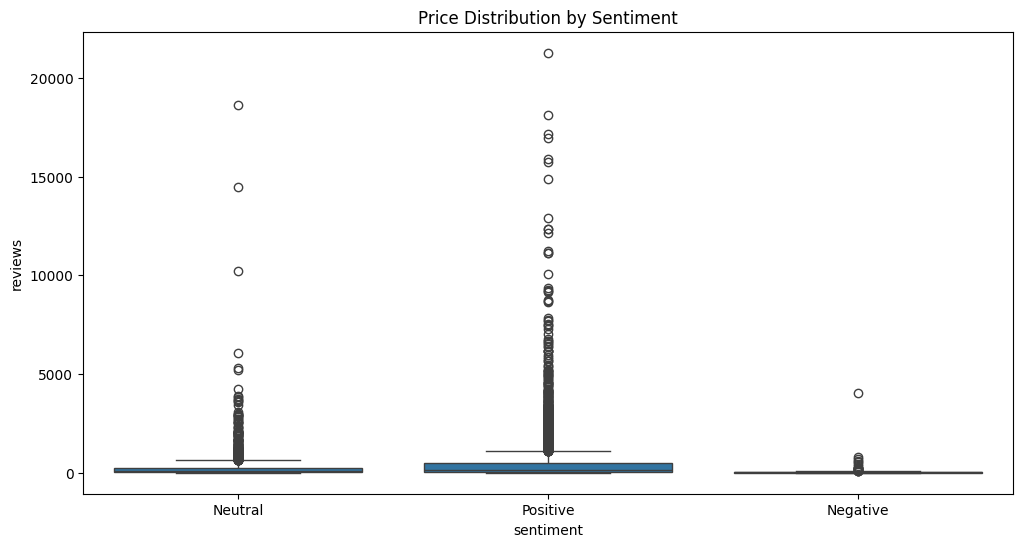

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='reviews', data=df)
plt.title('Price Distribution by Sentiment')
plt.show()


#Data Visualization

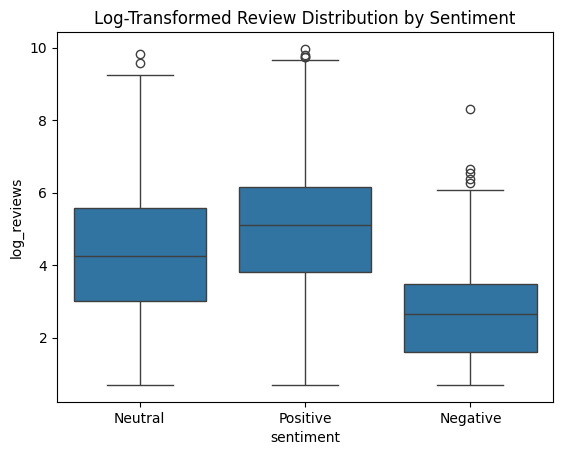

In [ ]:
import numpy as np
df['log_reviews'] = np.log1p(df['reviews'])  # Since reviews are skewed, log-transforming them can improve clarity:
sns.boxplot(x="sentiment", y="log_reviews", data=df)
plt.title('Log-Transformed Review Distribution by Sentiment')
plt.show()

In [ ]:
import pandas as pd

# Ensure ratings are numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Define top-rated products (e.g., rating >= 4.5)
top_rated_products = df[df["rating"] >= 4.5]

# Select relevant columns
top_rated_highlights = top_rated_products[['product_name', 'rating', 'highlights']]
top_rated_ingredients = top_rated_products[['product_name', 'rating', 'ingredients']]

# Display results
print("Top Rated Products - Highlights:")
print(top_rated_highlights.head(10))

print("\nTop Rated Products - Ingredients:")
print(top_rated_ingredients.head(10))


Top Rated Products - Highlights:
                                                product_name  rating  \
17  Mini AFRICAN Beauty Butter- Intensive Dry Skin Treatment  4.5175   
18                                        ABBOTT Sampler Set  4.8163   
19                                          The Cape Perfume  4.6111   
20                       Crescent Beach Perfume Travel Spray  4.7778   
21                                    Crescent Beach Perfume  4.5882   
23                                           Sequoia Perfume  4.6190   
24                               Mojave Perfume Travel Spray  4.7143   
27                                     Big Sky Eau de Parfum  4.6250   
36                                        Yuzu Eau de Parfum  4.6667   
38                                           Colonia Essenza  4.5333   

                                                                                                                             highlights  
17  ['Clean at Sephora', 'Hydrating'

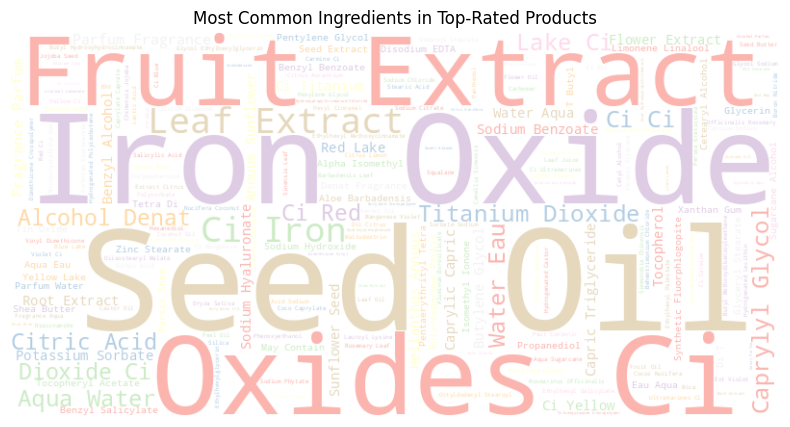

In [ ]:
from wordcloud import WordCloud

# Combine all ingredients into a single string
ingredient_text = " ".join(top_rated_products["ingredients"].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Pastel1").generate(ingredient_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Most Common Ingredients in Top-Rated Products")
plt.show()


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("product_info.csv")

# Filter relevant columns
df = df[['product_name', 'loves_count']]

# Convert loves_count into a binary format
df['loved'] = df['loves_count'].apply(lambda x: 1 if x > df['loves_count'].median() else 0)

# Pivot table to create a basket-like structure (Product Name as Columns, Loved as Values)
basket = df.pivot_table(index=df.index, columns='product_name', values='loved', aggfunc='max').fillna(0)

# Apply Apriori algorithm to find frequent item sets
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display top 10 strong associations
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

# ---- Visualization ----

# Create a graph
G = nx.Graph()

# Add edges (product associations)
for index, row in rules.iterrows():
    G.add_edge(str(list(row['antecedents'])[0]), str(list(row['consequents'])[0]), weight=row['lift'])

# Draw graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, width=[d['weight'] for (u, v, d) in G.edges(data=True)])
plt.title("Product Co-Love Network (Market Basket Analysis)")
plt.show()
